<a href="https://colab.research.google.com/github/karthikdoguparthi/AlmaBetter/blob/main/Capstone_Project_2_Amazon_Prime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Karthik Doguparthi

# **Project Summary -**

### Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Uncovering key trends that influence subscription growth analysing Amazon Prime dataset**

#### **Define Your Business Objective?**

Performing data analysis on Amazon Prime Dataset to findout few interesting facts about the shows and movies, content diversity, trends over time, regional diversity, IMBD ratings and rankings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        


# Chart visualization code

            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ast
from wordcloud import WordCloud

### Dataset Loading

In [2]:
# Load Dataset
titles = pd.read_csv('/content/titles.csv')
credits = pd.read_csv('/content/credits.csv')

In [3]:
#Merge the datasets normally gives wrong data with a lot of unwanted rows
merged_df = pd.merge(credits, titles, on='id', how='inner')

merged_df.shape

(124347, 19)

In [4]:
#Merge the datasets
merged_df = pd.merge(credits, titles, on='id', how='inner')

# Separate actors and directors
actors_df = merged_df[merged_df['role'] == 'ACTOR']
directors_df = merged_df[merged_df['role'] == 'DIRECTOR']

# Group each by movie and collect names & characters
actors_grouped = (
    actors_df.groupby('id', as_index=False)
    .agg({'name': list,'character': list})
    .rename(columns={'name': 'actor_names', 'character': 'actor_characters'}))

directors_grouped = (
    directors_df.groupby('id', as_index=False)
    .agg({'name': list})
    .rename(columns={'name': 'director_names'}))

# Merge both actor and director summaries back into titles
merged_df = (
    titles.merge(actors_grouped, on='id', how='left')
          .merge(directors_grouped, on='id', how='left')
)

# Fill NaNs with empty lists where applicable
merged_df['actor_names'] = merged_df['actor_names'].apply(lambda x: x if isinstance(x, list) else []).astype(str)
merged_df['actor_characters'] = merged_df['actor_characters'].apply(lambda x: x if isinstance(x, list) else []).astype(str)
merged_df['director_names'] = merged_df['director_names'].apply(lambda x: x if isinstance(x, list) else []).astype(str)

### Dataset First View

In [5]:
# Dataset First Look
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actor_names,actor_characters,director_names
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,"['Joe Besser', 'Moe Howard', 'Larry Fine']","['Joe', 'Moe', 'Larry']",[]
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,"['Buster Keaton', 'Marion Mack', 'Glen Cavende...","['Johnny Gray', 'Annabelle Lee', 'Captain Ande...","['Clyde Bruckman', 'Buster Keaton']"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,"['Myrna Loy', 'Fredric March', 'Dana Andrews',...","['Milly Stephenson', 'Al Stephenson', 'Fred De...",['William Wyler']
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,"['Cary Grant', 'Rosalind Russell', 'Ralph Bell...","['Walter Burns', 'Hildy Johnson', 'Bruce Baldw...",['Howard Hawks']
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,"['Humphrey Bogart', 'Gloria Grahame', 'Frank L...","[""Dixon 'Dix' Steele"", 'Laurel Gray', 'Det. Sg...",['Nicholas Ray']


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
merged_df.shape

(9871, 18)

### Dataset Information

In [7]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
 15  actor_names          

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
# Convert list columns to strings for duplication check
merged_df['actor_names_str'] = merged_df['actor_names'].astype(str)
merged_df['actor_characters_str'] = merged_df['actor_characters'].astype(str)
merged_df['director_names_str'] = merged_df['director_names'].astype(str)

# Check for duplicates using the new string columns
duplicate_count = merged_df.duplicated(subset=[
    'id', 'title', 'type', 'description', 'release_year', 'age_certification',
    'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id',
    'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'actor_names_str',
    'actor_characters_str', 'director_names_str']).sum()

print(f"Number of duplicate rows: {duplicate_count}")

# Drop the temporary string columns
merged_df = merged_df.drop(columns=['actor_names_str', 'actor_characters_str', 'director_names_str'])

Number of duplicate rows: 3


In [9]:
# Show duplicate rows
duplicate_rows = merged_df[merged_df.duplicated()]
display(duplicate_rows)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actor_names,actor_characters,director_names
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0,"['Buck Jones', 'Buck Jones', 'Tim McCoy', 'Tim...","['Buck Roberts', 'Buck Roberts', 'Marshal McCa...","['Spencer Gordon Bennet', 'Spencer Gordon Benn..."
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN,"['William Gargan', 'William Gargan', 'Richard ...","[""'Gunner' Peterson"", ""'Gunner' Peterson"", 'Jo...","['William H. Pine', 'William H. Pine', 'Willia..."
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN,"['Randolph Scott', 'Randolph Scott', 'Martha S...","['Dr. Robert Morley', 'Dr. Robert Morley', 'Ma...","['Robert G. Vignola', 'Robert G. Vignola', 'Ro..."


In [10]:
# Drop duplicate rows
merged_df.drop_duplicates(inplace=True)

In [11]:
# Dataset Rows & Columns count
merged_df.shape

(9868, 18)

#### Missing Values/Null Values

In [40]:
# Missing Values/Null Values Count
merged_df.isnull().sum()[merged_df.isnull().sum()>0]

,0
description,119
age_certification,6484
imdb_id,667
imdb_score,1021
imdb_votes,1031
tmdb_popularity,547
tmdb_score,2080


In [13]:
# Missing Values/Null Values Mean
merged_df.isnull().mean()[merged_df.isnull().mean()>0]*100

,0
description,1.205918
age_certification,65.707337
seasons,86.248480
imdb_id,6.759222
imdb_score,10.346575
imdb_votes,10.447912
tmdb_popularity,5.543170
tmdb_score,21.078233


<Axes: >

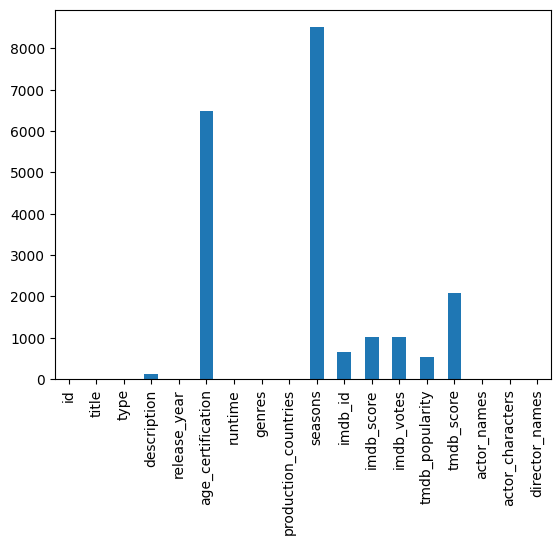

In [14]:
# Visualizing the missing values
merged_df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

After loading and merging my dataset, I noticed this was a large datset with 9868 rows and 18 columns within. When I saw the datset information I could find that count of all the columns are not same. Which imples there are NaN values in the dataset. Well what else can we hope from a real time dataset. I also noticed duplicate values in the dataset ( 3 duplicates values in the whole datset) and deleted them to maintain fairness in performing analysis.

Specifically:
- The dataset contains 9868 rows and 18 columns after merging and dropping duplicates.
- There are missing values in several columns, including description, age_certification, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score. The age_certification and seasons columns have a particularly high percentage of missing values.
- There were 3 duplicate rows identified and dropped.
- The dataset includes information about titles (movies and shows), their descriptions, release years, age certifications, runtimes, genres, production countries, seasons (for shows), and various IMDb and TMDB metrics (id, score, votes, popularity). It also includes the names and characters of actors and the names of directors.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
merged_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'actor_names', 'actor_characters', 'director_names'],
      dtype='object')

In [16]:
# Dataset Describe
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,9868.0,2001.345561,25.792295,1912.000000,1996.000,2014.000,2018.00,2022.000
runtime,9868.0,85.979124,33.515714,1.000000,65.000,89.000,102.00,549.000
seasons,1357.0,2.791452,4.148958,1.000000,1.000,1.000,3.00,51.000
imdb_score,8847.0,5.976534,1.344028,1.100000,5.100,6.100,6.90,9.900
imdb_votes,8837.0,8536.485119,45927.682220,5.000000,118.000,464.000,2237.00,1133692.000
tmdb_popularity,9321.0,6.912168,30.008727,0.000011,1.234,2.537,5.64,1437.906
tmdb_score,7788.0,5.984117,1.518040,0.800000,5.100,6.000,6.90,10.000


In [17]:
merged_df.describe(include='object').transpose()

,count,unique,top,freq
id,9868,9868,ts275838,1
title,9868,9737,The Lost World,3
type,9868,2,MOVIE,8511
description,9749,9734,No overview found.,5
age_certification,3384,11,R,1249
genres,9868,2028,['drama'],908
production_countries,9868,497,['US'],4807
imdb_id,9201,9201,tt13542552,1
actor_names,9868,8513,[],1263
actor_characters,9868,7588,[],1263


### Variables Description

Description of the variables in the dataset:

- **id**: Unique identifier for each title.
- **title**: The title of the movie or show.
- **type**: Indicates whether the title is a 'MOVIE' or a 'SHOW'.
- **description**: A brief summary of the title.
- **release_year**: The year the title was released.
- **age_certification**: The age rating of the title (R, TV-PG).
- **runtime**: The duration of the movie in minutes or the average runtime per episode for shows.
- **genres**: A list of genres associated with the title.
- **production_countries**: A list of countries where the title was produced.
- **seasons**: The number of seasons for a show.
- **imdb_id**: The IMDb identifier for the title.
- **imdb_score**: The IMDb rating for the title.
- **imdb_votes**: The number of votes on IMDb for the title.
- **tmdb_popularity**: The popularity score from The Movie Database (TMDB).
- **tmdb_score**: The TMDB rating for the title.
- **actor_names**: A list of actor names in the title (converted to string for duplicate checking).
- **actor_characters**: A list of character names played by actors in the title (converted to string for duplicate checking).
- **director_names**: A list of director names for the title (converted to string for duplicate checking).

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
merged_df.nunique()

,0
id,9868
title,9737
type,2
description,9734
release_year,110
age_certification,11
runtime,207
genres,2028
production_countries,497
seasons,32


## 3. ***Data Wrangling***

### Data Wrangling Code

In [51]:
# Write your code to make your dataset analysis ready.

# if show_type = 'Movie' replace the value of seasons from Nan to 0 nad if there is any value keep it the same
merged_df.loc[merged_df['type'] == 'MOVIE', 'seasons'] = merged_df.loc[merged_df['type'] == 'MOVIE', 'seasons'].fillna(0)

# change datatype of seasons from float64 to int64
merged_df['seasons'] = merged_df['seasons'].astype('int64')

# replace NaN in imdb_id column with 'ttttttttt'
merged_df['imdb_id'] = merged_df['imdb_id'].fillna('ttttttttt')

# replace NaN in	imdb_score	imdb_votes tmdb_popularity tmdb_score columns with their median
merged_df['imdb_score'] = merged_df['imdb_score'].fillna(merged_df['imdb_score'].median())
merged_df['imdb_votes'] = merged_df['imdb_votes'].fillna(merged_df['imdb_votes'].median())
merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].fillna(merged_df['tmdb_popularity'].median())
merged_df['tmdb_score'] = merged_df['tmdb_score'].fillna(merged_df['tmdb_score'].median())

# replace NaN in description column to 'no description'
merged_df['description'] = merged_df['description'].fillna('no description')

#replace NaN in age_certification column with relevant values
merged_df['age_certification'] = merged_df['age_certification'].fillna('Unknown')

In [53]:
# Checking if we handled all the null values or not
merged_df.isnull().sum()[merged_df.isnull().sum()>0]

,0


In [54]:
merged_df.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,actor_names,actor_characters,director_names
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26,tt0850645,8.6,1092.0,15.424,7.6,"['Joe Besser', 'Moe Howard', 'Larry Fine']","['Joe', 'Moe', 'Larry']",[]
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0,tt0017925,8.2,89766.0,8.647,8.0,"['Buster Keaton', 'Marion Mack', 'Glen Cavende...","['Johnny Gray', 'Annabelle Lee', 'Captain Ande...","['Clyde Bruckman', 'Buster Keaton']"
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Unknown,171,"['romance', 'war', 'drama']",['US'],0,tt0036868,8.1,63026.0,8.435,7.8,"['Myrna Loy', 'Fredric March', 'Dana Andrews',...","['Milly Stephenson', 'Al Stephenson', 'Fred De...",['William Wyler']
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Unknown,92,"['comedy', 'drama', 'romance']",['US'],0,tt0032599,7.8,57835.0,11.270,7.4,"['Cary Grant', 'Rosalind Russell', 'Ralph Bell...","['Walter Burns', 'Hildy Johnson', 'Bruce Baldw...",['Howard Hawks']
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Unknown,94,"['thriller', 'drama', 'romance']",['US'],0,tt0042593,7.9,30924.0,8.273,7.6,"['Humphrey Bogart', 'Gloria Grahame', 'Frank L...","[""Dixon 'Dix' Steele"", 'Laurel Gray', 'Det. Sg...",['Nicholas Ray']
5,tm160494,Stagecoach,MOVIE,A group of people traveling on a stagecoach fi...,1939,Unknown,96,"['western', 'drama']",['US'],0,tt0031971,7.8,48149.0,11.786,7.7,"['Claire Trevor', 'John Wayne', 'Andy Devine',...","['Dallas', 'The Ringo Kid', 'Buck', 'Hatfield'...",['John Ford']
6,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0,tt0038650,8.6,444243.0,26.495,8.3,"['James Stewart', 'Donna Reed', 'Lionel Barrym...","['George Bailey', 'Mary Hatch', 'Mr. Potter', ...",['Frank Capra']
7,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,Unknown,66,"['thriller', 'drama', 'crime']",['US'],0,tt0037638,7.3,17233.0,7.757,7.2,"['Tom Neal', 'Ann Savage', 'Claudia Drake', 'E...","['Al Roberts', 'Vera', 'Sue Harvey', 'Charles ...",['Edgar G. Ulmer']
8,tm116781,My Man Godfrey,MOVIE,"Fifth Avenue socialite Irene Bullock needs a ""...",1936,Unknown,95,"['comedy', 'romance', 'drama']",['US'],0,tt0028010,8.0,23532.0,8.633,7.6,"['William Powell', 'Carole Lombard', 'Alice Br...","['Godfrey', 'Irene Bullock', 'Angelica Bullock...",['Gregory La Cava']
9,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,Unknown,57,"['crime', 'drama']",['US'],0,tt0026683,4.0,864.0,3.748,3.6,"['Harley Wood', 'Hugh McArthur', 'Paul Ellis',...","[""Burma Roberts aka 'Blondie'"", 'Dick Collier'...",['Dwain Esper']


In [19]:
#download the merged_df dataset
merged_df.to_csv('merged_df_clean.csv')

### What all manipulations have you done and insights you found?


**Manipulations:**

  -- I identified and removed 3 duplicate rows in the merged dataset to ensure data integrity for analysis.

**Handled Missing Values:**

  -- For MOVIE types, we filled missing 'seasons' values with 0, as movies do not have seasons.

  -- I filled missing age_certification values with Unknown as it's a categorical variable with a significant number of missing entries.

  -- I handled missing values in description, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score by replacing them with the median values so that outliers does not affect them.

**Initial insights:**

-- The dataset contains a substantial 9868 rows and 18 columns.

-- There are several columns with missing values, with age_certification and seasons having the highest percentages of missing data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

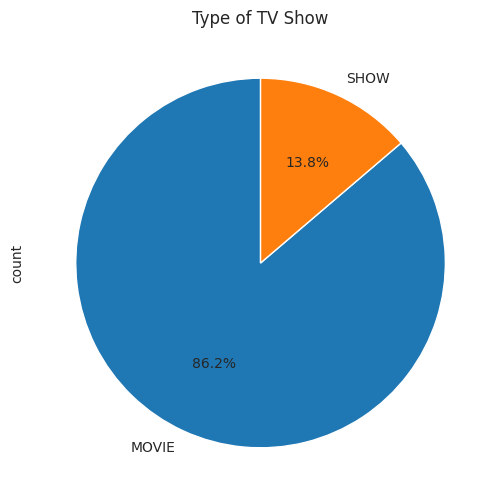

In [63]:
# Chart - 1 visualization code
#pie chart of count of type column
sns.set_style('whitegrid')
merged_df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Type of TV Show')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart for the 'type' column because it has only 2 category ('MOVIE' and 'SHOW') within the entire dataset. So, pie chart provides a clear and simple representation of the 2 categories.

##### 2. What is/are the insight(s) found from the chart?

From the pie chart, the primary insight is the distribution of content types available in this dataset. It clearly shows titles that are classified as 'MOVIE' and 'SHOW'. Here, 'MOVIE' is more dominant compared to 'SHOW' category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely it will lead to positive impact because it clearly shows us what type of show is on the platform to watch and which type of content is most available on the platform.

#### Chart - 2

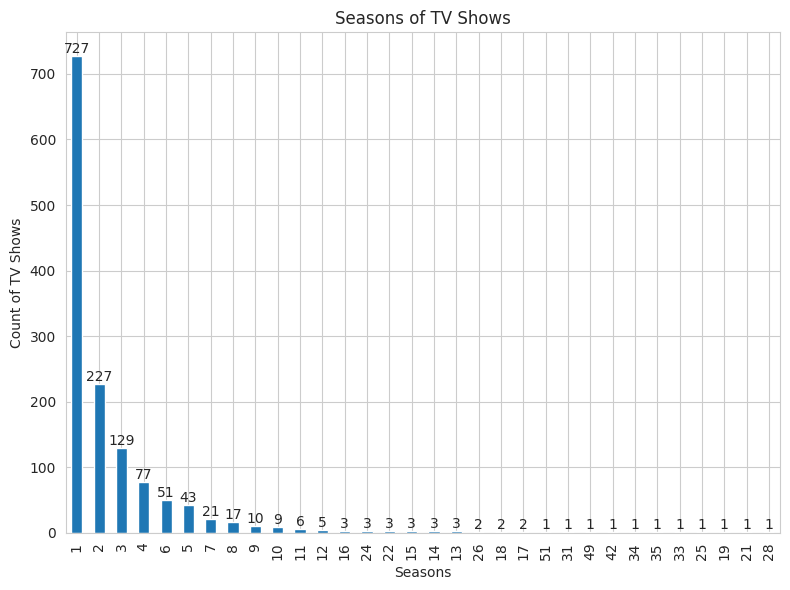

In [76]:
# Chart - 2 visualization code

# Bar chart of seasons column with type = 'Show'
merged_df[merged_df['type'] == 'SHOW']['seasons'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Seasons of TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Count of TV Shows')
plt.tight_layout()

# Frequency of each season
for i, count in enumerate(merged_df[merged_df['type'] == 'SHOW']['seasons'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the 'seasons' column specifically for TV shows (type == 'SHOW') because a bar chart is effective for displaying the distribution of the number of seasons. It clearly shows the count of TV shows for each specific number of seasons which is easy to compare the frequency of shows with different season lengths.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart showing the distribution of seasons for TV shows, the frequency of shows based on the number of seasons they have. We can observe that 1 season is most prominent and we have more than 700 shows that are having 1 season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from the bar chart for TV shows can help create a positive business impact. Knowing the most common number of seasons for TV shows on the platform can inform content strategy. This could lead to increased viewer engagement and attract new subscribers interested in that type of content. Also, if shows has very high season counts it leads to low viewership.

#### Chart - 3

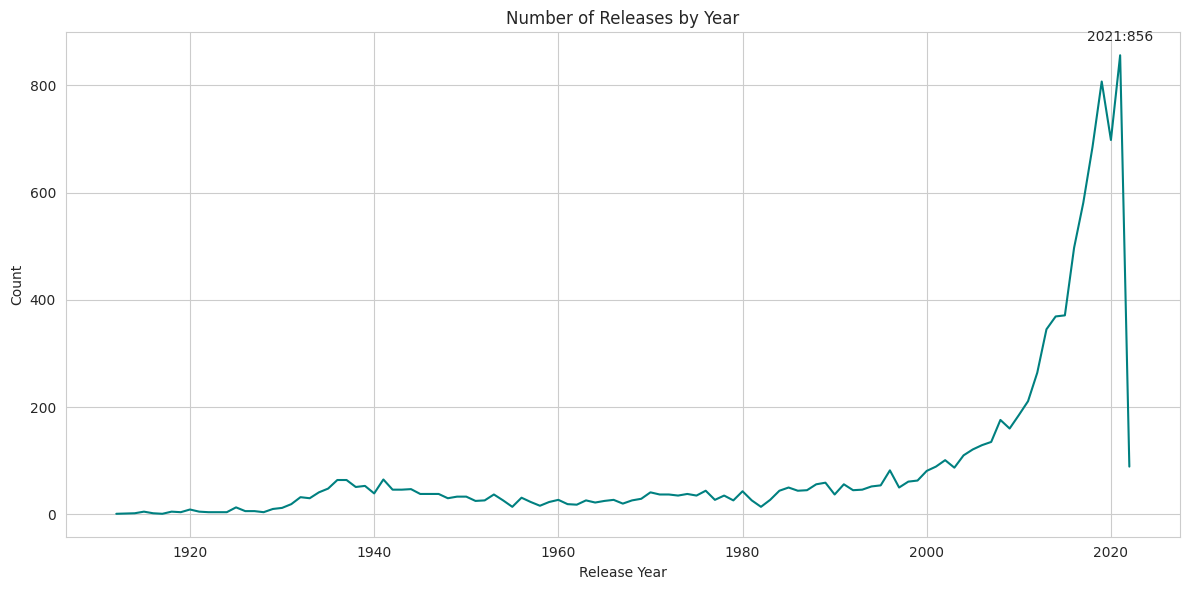

In [95]:
# Chart - 3 visualization code

# Release year trend how content releases have changed over time
plt.figure(figsize=(12,6))
releases_by_year = merged_df['release_year'].value_counts().sort_index()
plt.plot(releases_by_year.index, releases_by_year.values, color='teal')

plt.title('Number of Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
peak_years = releases_by_year.nlargest(1).index

# Add annotations for peak years
for year, count in releases_by_year.items():
    if year in peak_years:
        plt.annotate(f'{year}:{count}', (year, count), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked line chart because it is ideal for visualizing trends over a continuous period. It shows how the number of releases has changed year by year.

##### 2. What is/are the insight(s) found from the chart?

From number of releases chart, we can observe the content availability on Amazon Prime over time. The chart reveals periods of growth in releases. This insight helps understand the platform's content expansion strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Observing a consistent increase in content releases over the years can indicate a strong investment in expanding the content library, which is important for attracting subscribers. Identifying peak years of releases can also inform strategies around marketing to promote the platform.

#### Chart - 4

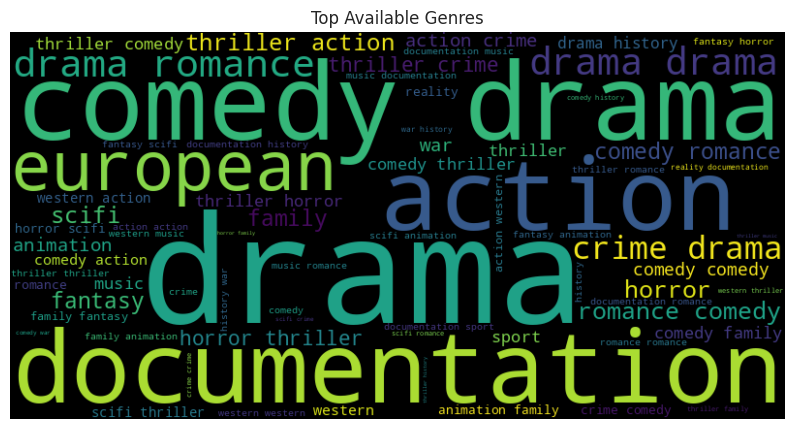

In [109]:
# Chart - 4 visualization code

# Drop NaNs and ensure everything is a list
genre_series = merged_df['genres'].dropna().apply(lambda x: x if isinstance(x, list) else str(x).strip("[]").replace("'", "").split(','))
all_genres = [genre.strip() for sublist in genre_series for genre in sublist if isinstance(genre, str)]
genre_text = ' '.join(all_genres)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(genre_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Available Genres')
plt.show()

##### 1. Why did you pick the specific chart?



I picked a word cloud to visualize the distribution of genres because it provides a visually engaging way to represent the frequency of different genres in the dataset. Here, the size of each word is proportional to its frequency, making it easy to quickly identify the most common genres available on Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

From the word cloud, identification of the most available genres available on Amazon Prime is easy. The genres that appear largest in the word cloud are the most frequent ones in the dataset. This provides a quick visual summary of the most available content categories on the Amazon Prime.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely based on this we can know what type of mixed content audience are prefering and what content should the company invest on.

#### Chart - 5

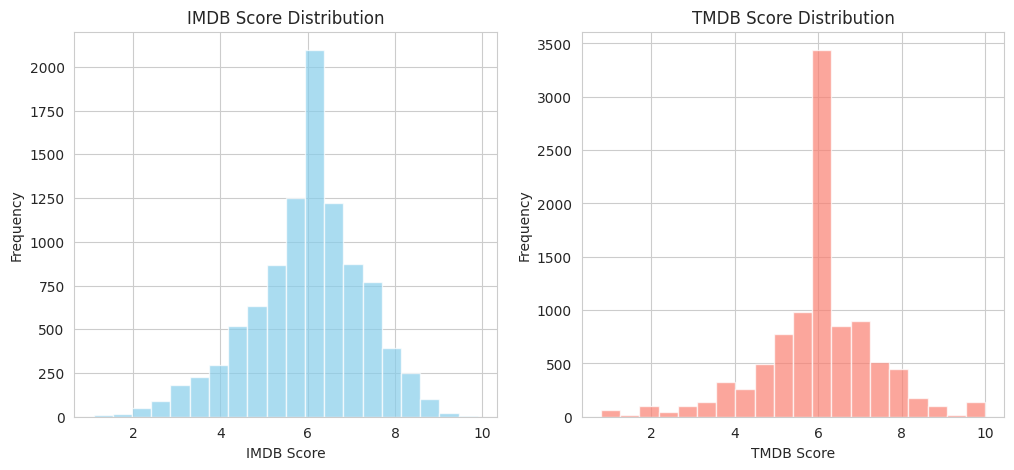

In [110]:
# Chart - 5 visualization code

# IMDB and TMDB score distribution

# Create figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot imdb_score histogram
axes[0].hist(merged_df['imdb_score'].dropna(), bins=20, alpha=0.7, color='skyblue')
axes[0].set_title('IMDB Score Distribution')
axes[0].set_xlabel('IMDB Score')
axes[0].set_ylabel('Frequency')

# Plot tmdb_score histogram
axes[1].hist(merged_df['tmdb_score'].dropna(), bins=20, alpha=0.7, color='salmon')
axes[1].set_title('TMDB Score Distribution')
axes[1].set_xlabel('TMDB Score')
axes[1].set_ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I used histogram to find out the distribution frequency of single numerical value within the spread and to find any unusual patterns.

##### 2. What is/are the insight(s) found from the chart?

We can observe the shape of the distributions, such as whether they are skewed or normally distributed, and identify the most frequent score ranges for both IMDb and TMDB. Comparing the two histograms, we can say that 6 is the median value for both IMDB and TMDB ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from the IMDb and TMDB score distribution charts can help create a positive business impact. Understanding the typical rating range of content on the platform is crucial. If the distribution shows a highly peak values, it is a positive insight. If the distribution is heavily skewed towards lower scores, or if there's a significant peak in the lower rating ranges, this could lead to negative growth.

#### Chart - 6

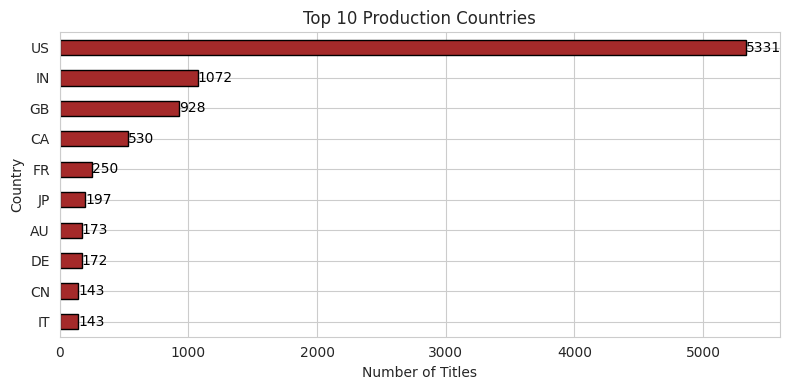

In [122]:
# Chart - 6 visualization code

def extract_countries(val):
    try:
        parsed = ast.literal_eval(val) if isinstance(val, str) else val
        if isinstance(parsed, (dict, list)) and not parsed:
            return []
        return [parsed] if isinstance(parsed, str) else parsed
    except:
        return []


exploded = (merged_df.assign(parsed_countries=merged_df['production_countries']
            .apply(extract_countries)).explode('parsed_countries'))

exploded = exploded[exploded['parsed_countries'].astype(bool)]
top_countries = exploded['parsed_countries'].value_counts().head(10)

plt.figure(figsize=(8, 4))
top_countries.sort_values(ascending=True).plot(kind='barh',color='brown',edgecolor='black')
plt.title('Top 10 Production Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()

for index, value in enumerate(top_countries.sort_values(ascending=True).values):
    plt.text(value, index, str(value), va='center', color='black')

plt.show()

##### 1. Why did you pick the specific chart?

I picked a horizontal bar chart because it is an effective way to display and compare the counts of titles for the top 10 production countries. Bar chart makes it easy to visually compare the number of titles produced by each country and quickly identify the countries with the highest production in the dataset.

##### 2. What is/are the insight(s) found from the chart?

When comes to movies or show production like we know Hollywood industry is very vast, it clearly shows how many shoes were produced overall by the industry. US clearly dominates the production values and next comes India in ranking but the difference between first and second places is also incomparible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the top production countries can definitely have a positive business impact. Knowing where most of the content originates helps in understanding the target audience and can inform strategies for acquiring more content from those regions or even investing in local productions.

#### Chart - 7

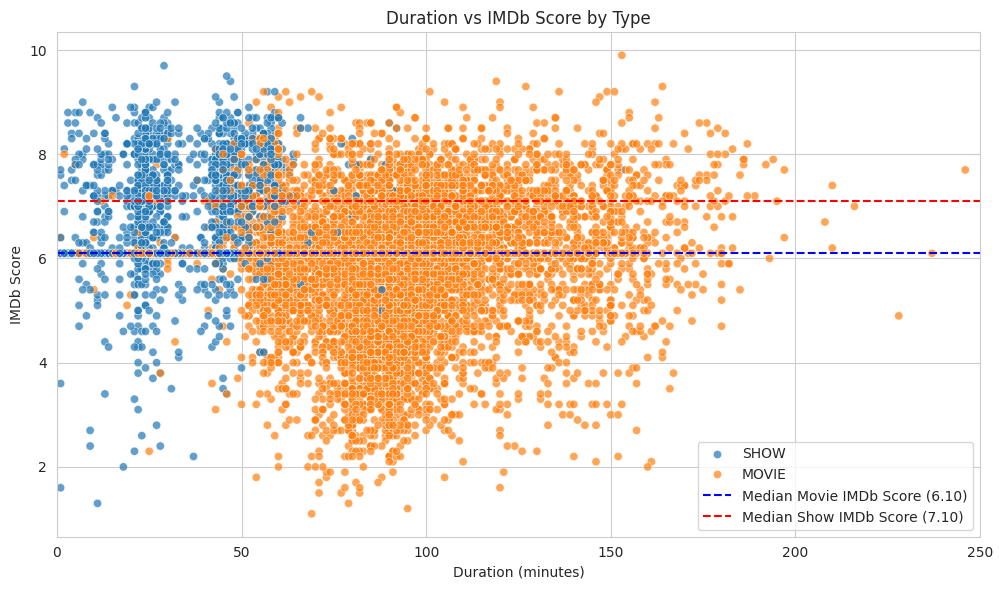

In [130]:
# Chart - 7 visualization code

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='runtime', y='imdb_score', hue='type', alpha=0.7)
plt.title('Duration vs IMDb Score by Type')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.xlim(0, 250)

# Calculating median IMDb score for Movies and Shows
median_imdb_movie = merged_df[merged_df['type'] == 'MOVIE']['imdb_score'].median()
median_imdb_show = merged_df[merged_df['type'] == 'SHOW']['imdb_score'].median()

# Median IMDb scores
plt.axhline(y=median_imdb_movie, color='blue', linestyle='--', label=f'Median Movie IMDb Score ({median_imdb_movie:.2f})')
plt.axhline(y=median_imdb_show, color='red', linestyle='--', label=f'Median Show IMDb Score ({median_imdb_show:.2f})')

plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [29]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [30]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [31]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [32]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [33]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [34]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [35]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [36]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***